In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [71]:
sns.set(style="whitegrid")

In [72]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', 
                 header=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


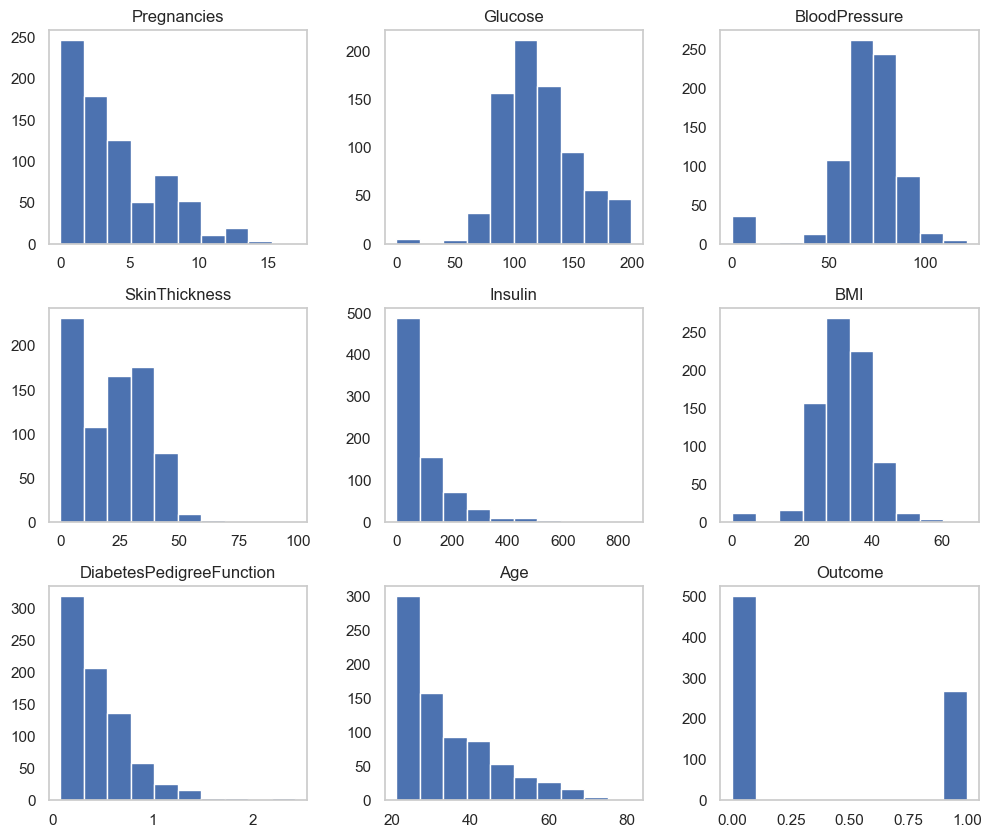

In [73]:

# Assigning column names
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
              'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df.head()
df.info()
df.describe()
df.isnull().sum()
df.hist(bins=10, figsize=(12, 10), grid=False)
plt.show()



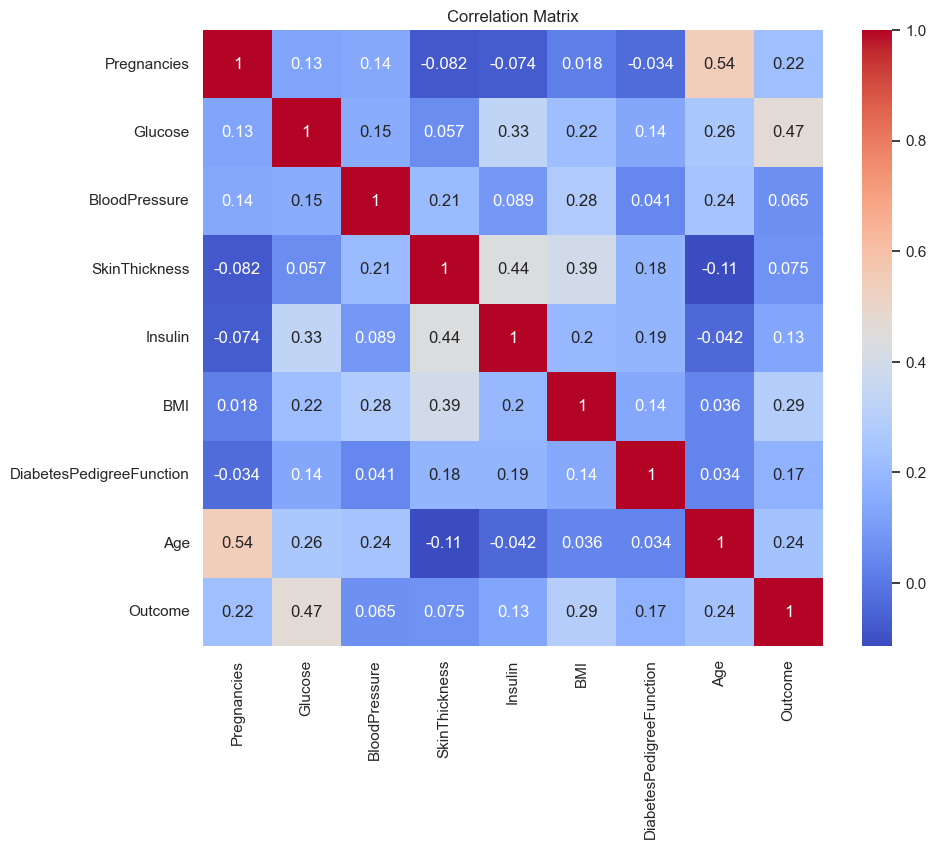

In [74]:
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [75]:
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_to_replace:
    df[column] = df[column].replace(0, df[column].median())

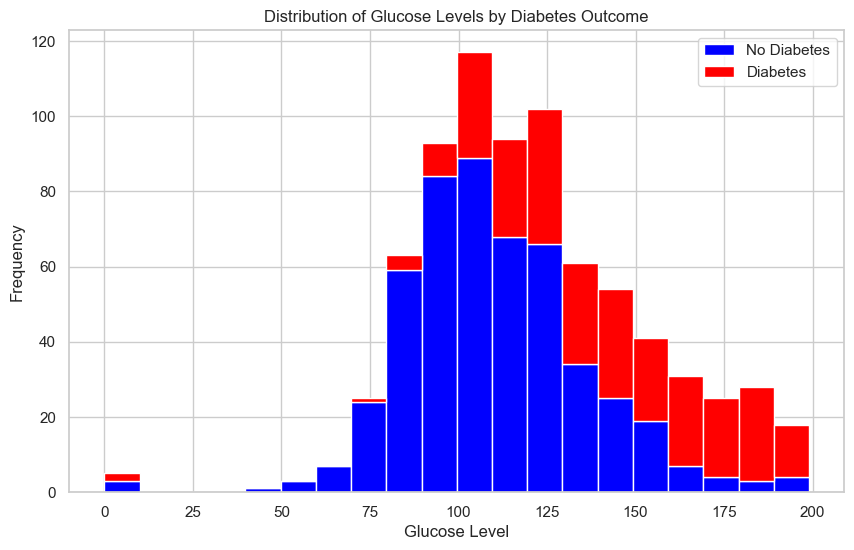

In [76]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', 
                 header=None)
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
              'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
plt.figure(figsize=(10, 6))
plt.hist([df[df['Outcome'] == 0]['Glucose'], df[df['Outcome'] == 1]['Glucose']], bins=20, stacked=True, color=['blue', 'red'], label=['No Diabetes', 'Diabetes'])
plt.title('Distribution of Glucose Levels by Diabetes Outcome')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.legend()
plt.show()

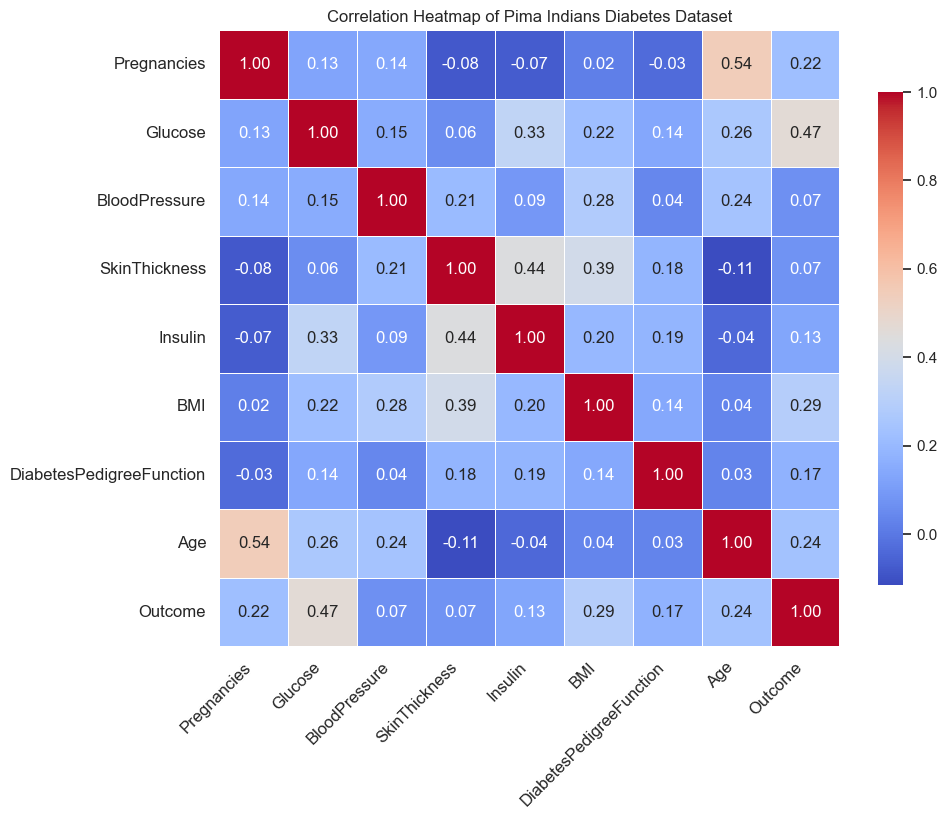

In [77]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Pima Indians Diabetes Dataset')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()


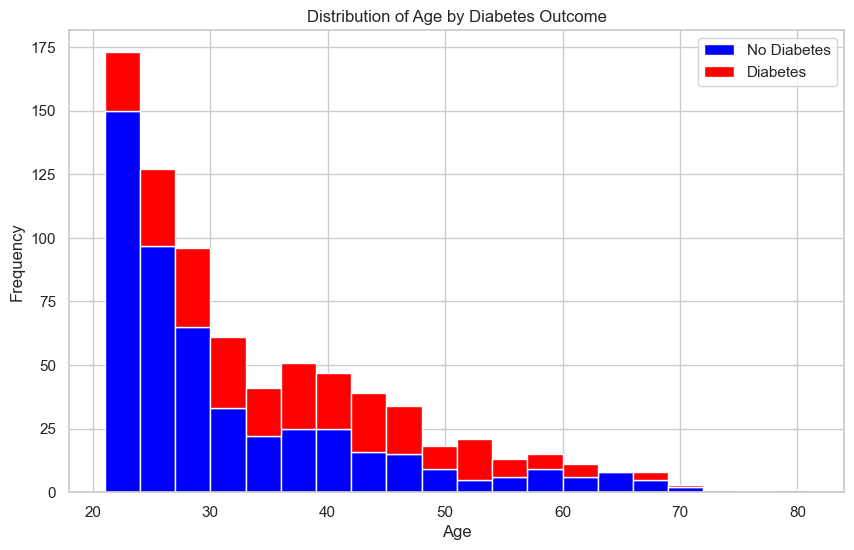

In [82]:
plt.figure(figsize=(10, 6))
plt.hist([df[df['Outcome'] == 0]['Age'], df[df['Outcome'] == 1]['Age']], bins=20, stacked=True, color=['blue', 'red'], label=['No Diabetes', 'Diabetes'])
plt.title('Distribution of Age by Diabetes Outcome')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


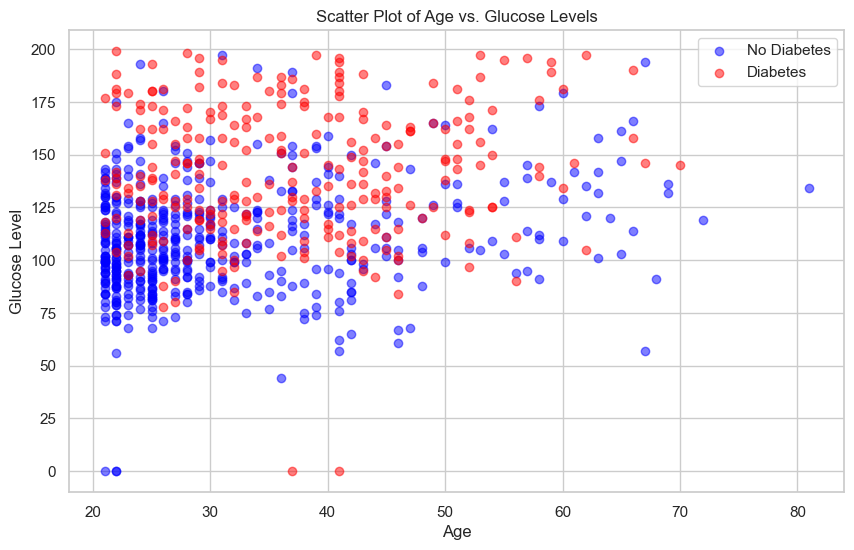

In [80]:
# Scatter plot of Age vs. Glucose
plt.figure(figsize=(10, 6))
plt.scatter(df[df['Outcome'] == 0]['Age'], df[df['Outcome'] == 0]['Glucose'], label='No Diabetes', color='blue', alpha=0.5)
plt.scatter(df[df['Outcome'] == 1]['Age'], df[df['Outcome'] == 1]['Glucose'], label='Diabetes', color='red', alpha=0.5)
plt.title('Scatter Plot of Age vs. Glucose Levels')
plt.xlabel('Age')
plt.ylabel('Glucose Level')
plt.legend()
plt.grid(True)
plt.show()
